In [30]:
import warnings
warnings.filterwarnings('ignore')

# Pré-processamento de dados
## abertura da base de dados

In [31]:
import pandas as pd
dados = pd.read_csv('base_preprocessamento_01.csv')
dados.columns = [x.lower() for x in dados.columns]

In [32]:
dados

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,no,2,1
...,...,...,...,...,...,...,...,...,...
5893,Bachelors,2012,Hyderabad,3,32,Female,no,2,1
5894,High School,2017,Bangalore,3,29,Male,No,2,0
5895,High School,2013,New Delhi,3,25,Female,No,5,1
5896,High School,2011,Ahmedabad,3,29,Male,No,5,0


In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   object
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   object
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   object
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.8+ KB


## Verificando os atributos do dataframe

In [34]:
dados.education.value_counts()

education
Bachelors      3729
Masters        1000
High School     851
PHD             318
Name: count, dtype: int64

In [35]:
dados.joiningyear.value_counts()
# é necessário substituir o Not Available

joiningyear
2017             1230
2015              886
2014              832
2013              751
2016              639
2012              607
2018              482
2011              125
2019              124
2010              120
Not available     102
Name: count, dtype: int64

In [36]:
dados.city.value_counts()

city
Bangalore    2406
Pune         1444
New Delhi    1325
Chennai       186
Ahmedabad     182
Hyderabad     182
Mumbai        173
Name: count, dtype: int64

In [37]:
dados.paymenttier.value_counts()

paymenttier
3    4424
2    1175
1     299
Name: count, dtype: int64

In [38]:
dados.gender.value_counts()
# É necessário tratar os male e female escritos diferentes

gender
Male      3350
Female    2261
male       168
female     119
Name: count, dtype: int64

In [39]:
dados.everbenched.value_counts()
# É necessário tratar os no e yes escritos diferentes

everbenched
No     5038
Yes     586
no      150
yes     124
Name: count, dtype: int64

In [40]:
dados.experienceincurrentdomain.value_counts()
# É necessário tratar o not available

experienceincurrentdomain
2                1322
4                1164
5                1129
3                 958
1                 691
0                 435
Not available     179
7                  11
6                   9
Name: count, dtype: int64

In [60]:
dados.age.value_counts()

age
26               675
28               660
27               655
25               457
24               438
29               269
30               246
36               185
37               179
39               179
34               176
32               176
38               173
33               173
35               168
40               168
31               158
Not available    126
41               113
23               106
22                99
45                53
21                52
20                47
43                44
48                43
46                41
49                39
Name: count, dtype: int64

In [41]:
### Normalização de escrita - coluna gender - solução: colocar todos com a primeira letra maiúscula
dados['gender'] = [x.capitalize() for x in dados['gender']]
dados['gender'].value_counts()

gender
Male      3518
Female    2380
Name: count, dtype: int64

In [42]:
### Normalização de escrita - coluna everbenched - solução: colocar todos com a primeira letra maiúscula
dados['everbenched'] = [x.capitalize() for x in dados['everbenched']]
dados['everbenched'].value_counts()

everbenched
No     5188
Yes     710
Name: count, dtype: int64

### Tratamento da coluna joiningyear:
averiguar proporção de dados não disponíveis

In [43]:
prop = dados.joiningyear.value_counts()
prop = pd.DataFrame(prop)
prop

,count
joiningyear,
2017,1230
2015,886
2014,832
2013,751
2016,639
2012,607
2018,482
2011,125
2019,124


In [44]:
prop['proporcao'] = prop['count']/prop['count'].sum()*100
prop

,count,proporcao
joiningyear,,
2017,1230,20.854527
2015,886,15.022041
2014,832,14.106477
2013,751,12.733130
2016,639,10.834181
2012,607,10.291624
2018,482,8.172262
2011,125,2.119362
2019,124,2.102408


Como a proporção de dados não disponíveis é quase igual a proporção de dados de outra categoria, não é recomendado eliminar esses dados.

Averiguar como os dados disponíveis estão distribuídos

In [45]:
analise_ano = dados[['joiningyear']]
analise_ano_filtrado = analise_ano[analise_ano['joiningyear']!='Not available']
analise_ano_filtrado.value_counts()

joiningyear
2017           1230
2015            886
2014            832
2013            751
2016            639
2012            607
2018            482
2011            125
2019            124
2010            120
Name: count, dtype: int64

(array([1230.,  751.,  832.,  639.,  886.,  607.,  482.,  124.,  120.,
         125.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

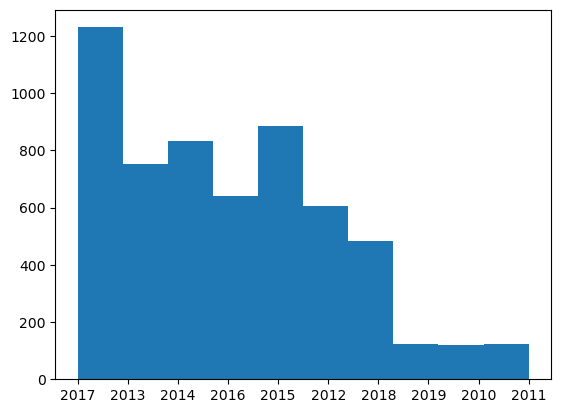

In [46]:
import matplotlib.pyplot as plt
plt.hist(analise_ano_filtrado.joiningyear)

Olhando o histograma acima, é possível ver que os dados do eixo x não estão em ordem crescente, como deveriam estar em um histograma.

Isso possivelmente está ocorrendo por que os dados dessa coluna são strings e não ints. No .info() é possível observar que o Dtype da coluna após a filtragem continua como 'object'

In [47]:
analise_ano_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5796 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   joiningyear  5796 non-null   object
dtypes: object(1)
memory usage: 90.6+ KB


Tratando

In [48]:
analise_ano_filtrado['joiningyear'] = analise_ano_filtrado['joiningyear'].astype(int)
analise_ano_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5796 entries, 0 to 5897
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   joiningyear  5796 non-null   int32
dtypes: int32(1)
memory usage: 67.9 KB


(array([ 120.,  125.,  607.,  751.,  832.,  886.,  639., 1230.,  482.,
         124.]),
 array([2010. , 2010.9, 2011.8, 2012.7, 2013.6, 2014.5, 2015.4, 2016.3,
        2017.2, 2018.1, 2019. ]),
 <BarContainer object of 10 artists>)

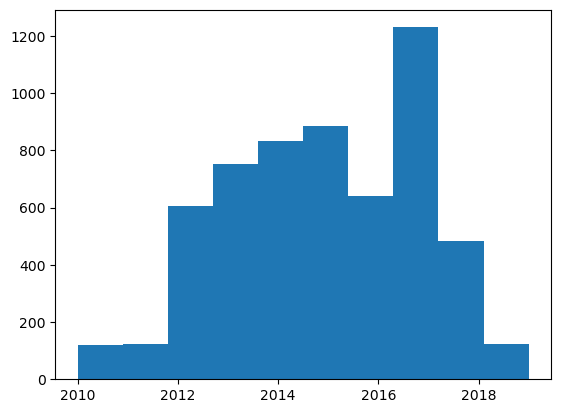

In [49]:
plt.hist(analise_ano_filtrado.joiningyear)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5e2aae760>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5e2aaed00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5e2aae490>],
 'medians': [<matplotlib.lines.Line2D at 0x1e5e2abb2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5e2abb5b0>],
 'means': []}

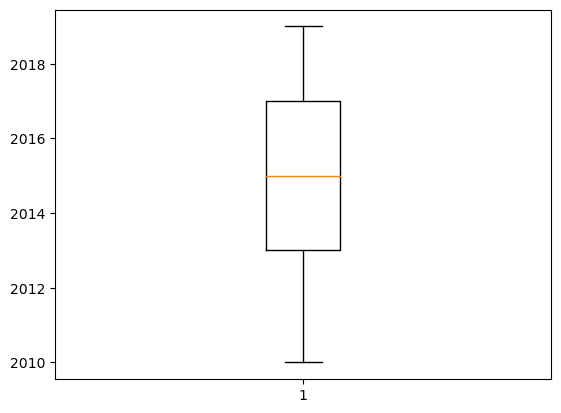

In [50]:
plt.boxplot(analise_ano_filtrado.joiningyear)

Precisamos inputar valores no lugar dos 'Not available' da base de dados. Mas não podemos, por exemplo, somente imputar com o valor mais frequente, ou com a média... Isso poderia distorcer a distribuição de dados. Vejamos:

1. Substituir o valor faltante pela média arredondada:

In [51]:
media = analise_ano_filtrado.joiningyear.mean()
media = int(media)
media

2014

In [52]:
import numpy as np
analise_ano_copia = analise_ano.copy()
analise_ano_copia['joiningyear'] = np.where(
    analise_ano_copia['joiningyear']=='Not available', ### condição
    str(media), ### o que fazer caso atenda a condição
    analise_ano_copia['joiningyear']) ### o que fazer caso não atenda a condição

In [53]:
analise_ano_copia.joiningyear.value_counts()

joiningyear
2017    1230
2014     934
2015     886
2013     751
2016     639
2012     607
2018     482
2011     125
2019     124
2010     120
Name: count, dtype: int64

Transformando em ints, comparando médias, histogramas e boxplots de antes e depois (no antes, somente os dados numéricos do ano)

In [54]:
analise_ano_copia['joiningyear'] = analise_ano_copia['joiningyear'].astype(int)
media_antes = analise_ano_filtrado.joiningyear.mean()
media_depois = analise_ano_copia.joiningyear.mean()
print(f'Média antes: {media_antes}, Média depois: {media_depois}')

Média antes: 2014.9630779848171, Média depois: 2014.946422516107


In [55]:
analise_ano_filtrado.joiningyear.describe()

count    5796.000000
mean     2014.963078
std         2.125165
min      2010.000000
25%      2013.000000
50%      2015.000000
75%      2017.000000
max      2019.000000
Name: joiningyear, dtype: float64

In [56]:
analise_ano_copia.joiningyear.describe()

count    5898.000000
mean     2014.946423
std         2.110443
min      2010.000000
25%      2013.000000
50%      2015.000000
75%      2017.000000
max      2019.000000
Name: joiningyear, dtype: float64

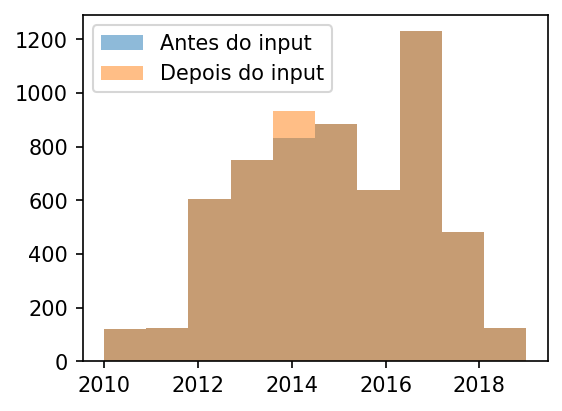

In [57]:
fig,ax = plt.subplots(1,figsize = (4,3),dpi = 150)
ax.hist(analise_ano_filtrado.joiningyear,alpha = 0.5)
ax.hist(analise_ano_copia.joiningyear,alpha=0.5)
ax.legend(['Antes do input','Depois do input'])

[Text(1, 0, 'Antes do input'), Text(2, 0, 'Depois do input')]

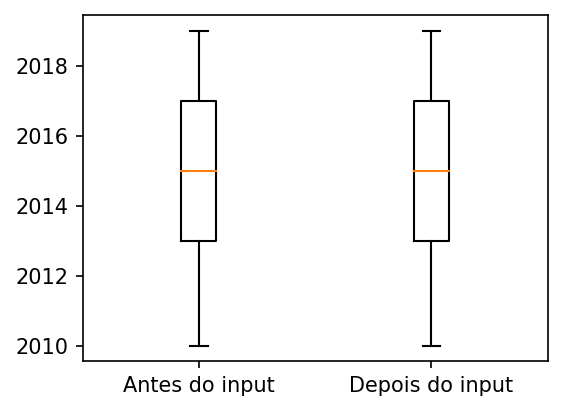

In [58]:
fig,ax = plt.subplots(1,figsize = (4,3),dpi = 150)
dados_para_plotar = [analise_ano_filtrado.joiningyear,analise_ano_copia.joiningyear]
ax.boxplot(dados_para_plotar)
ax.set_xticklabels(['Antes do input', 'Depois do input'])
# ax.legend(['Antes do input','Depois do input'])

## Conclusão:

Inputar o valor da média dos valores numéricos na coluna 'joiningyear' é uma prática plausível uma vez que a distribuição dos dados não foi afetada significativamente de acordo com a descrição dos dados, com o histograma e com o boxplot

# Tarefa 1

Inputar o valor mais frequente e verificar se é a distribuição dos dados é afetada por meio dos mesmos métodos

# Tarefa 2 (nivel mais alto de dificuldade)

2.1 - Definir uma função que gera aleatoriamente dados distribuídos segundo uma distribuição normal baseados na média e no desvio padrão da população de dados numéricos da coluna

2.2 - Utilizar essa função para inputar dados no lugar dos dados não disponíveis

2.3 - Fazer a averiguação se a distribuição foi afetada pelos dados inputados

# Tarefa 3

Fazer o mesmo procedimento para a coluna "```experienceincurrentdomain```" e "```age```" (analisar como os dados estão distribuídos, se é melhor imputar pela média, pelo valor mais frequente ou se é mais interessante imputar aleatorimento baseado na distribuição dos dados não faltantes)